# Aim

1. This notebook is aimed towards doing bi-variate and multivariate analysis
1. as number of combinations for bi-variate analysis are high selecting a few variables to do bi-variate analysis on


In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_ROOT = "../data"

In [3]:
df = pd.read_csv(f"{DATA_ROOT}/eda/clean-data.csv")
df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day


# Bivariate analysis

##  Severity - Distance(mi)

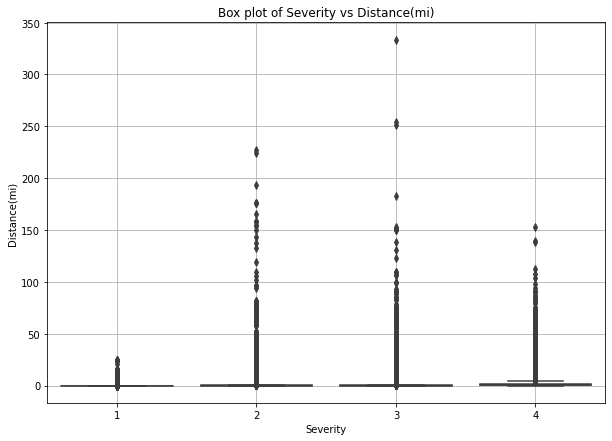

In [20]:
_ = df[["Distance(mi)", "Severity"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of Severity vs Distance(mi)")
sns.boxplot(x="Severity", y="Distance(mi)", data=_)
plt.grid()
plt.show()

1. Distance of road affected by different severities of accidents show long tailed distribution
1. We can see that accidents of severity 3 have the longest tail

## Severity - City

In [53]:
topk = 10
df_temp = df[["Severity", "City"]]
topk_cities = df_temp["City"].value_counts().head(topk).reset_index()["index"].values
df_temp = df_temp[df_temp["City"].isin(topk_cities)]

df_temp["per_city_severity_sum"] = 1

df_temp = df_temp.groupby(["City", "Severity"], as_index=False).sum()
df_temp.head()

,City,Severity,per_city_severity_sum
0,Atlanta,1,121
1,Atlanta,2,14950
2,Atlanta,3,24422
3,Atlanta,4,1633
4,Austin,1,17


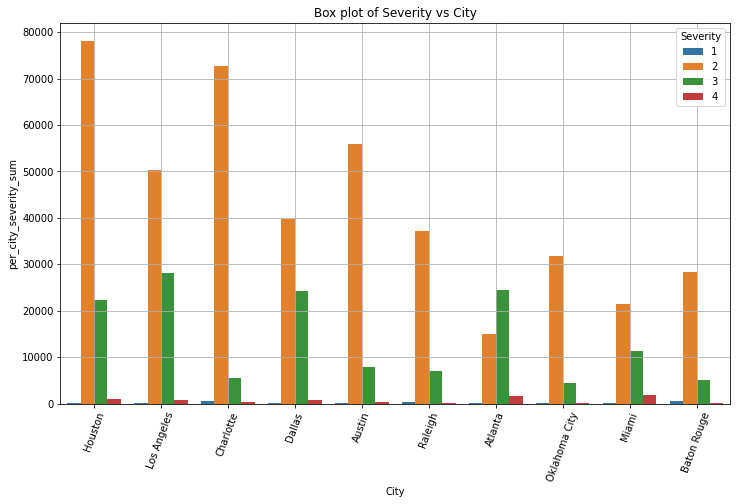

In [54]:
plt.figure(figsize=[12, 7])
plt.title("Box plot of Severity vs City")
sns.barplot(
    y="per_city_severity_sum", x="City", data=df_temp, hue="Severity", order=topk_cities
)
plt.grid()
plt.xticks(rotation=70)
plt.show()

1. In top 10 cities Houston has maximum numbers of Severity 2 accidents
1. Severity 4 accidents are comparitively lower in these top 10 cities as compared to other severities

## Severity - State

In [81]:
topk = 10
df_temp = df[["Severity", "State"]]
topk_states = df_temp["State"].value_counts().head(topk).reset_index()["index"].values
df_temp = df_temp[df_temp["State"].isin(topk_cities)]

df_temp["per_state_severity_sum"] = 1

df_temp = df_temp.groupby(["State", "Severity"], as_index=False).sum()
df_temp.head()

,State,Severity,per_state_severity_sum
0,CA,1,5801
1,CA,2,576742
2,CA,3,225820
3,CA,4,8462
4,FL,1,3014


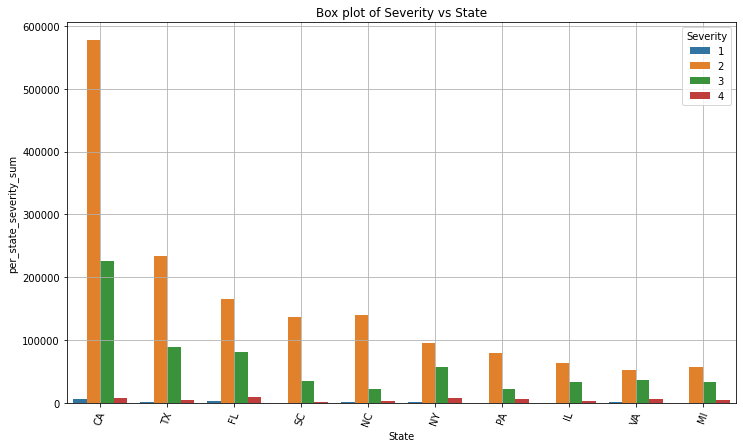

In [82]:
plt.figure(figsize=[12, 7])
plt.title("Box plot of Severity vs State")
sns.barplot(
    y="per_state_severity_sum",
    x="State",
    data=df_temp,
    hue="Severity",
    order=topk_states,
)
plt.grid()
plt.xticks(rotation=70)
plt.show()

1. California has highest number of severity 2 accidents 
1. Severity 2 cases are high in top 10 states of most occuring accidents
1. Severity 3 and 4 accidents are comparitively lower in these top 10 states

## Severity - Temperature

In [71]:
pd.options.mode.chained_assignment = None  # default='warn'
df_temp = df[["Temperature(F)", "Severity"]]
df_temp["Temperature(C)"] = (df_temp["Temperature(F)"] - 32) / 1.8
df_temp

,Temperature(F),Severity,Temperature(C)
0,36.9,3,2.722222
1,37.9,2,3.277778
2,36.0,2,2.222222
3,35.1,3,1.722222
4,36.0,2,2.222222
...,...,...,...
3513612,86.0,2,30.000000
3513613,70.0,2,21.111111
3513614,73.0,2,22.777778
3513615,71.0,2,21.666667


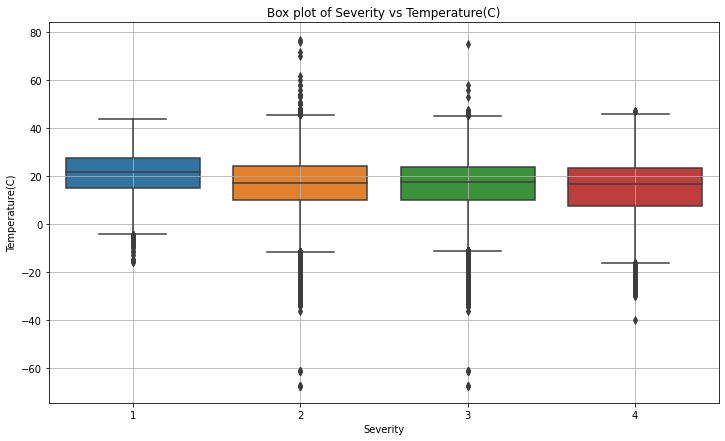

In [72]:
plt.figure(figsize=[12, 7])
plt.title("Box plot of Severity vs Temperature(C)")
sns.boxplot(
    y="Temperature(C)", x="Severity", data=df_temp,
)
plt.grid()
plt.show()

1. IQR of temperatures across all severities is more or less similar
1. Tails of box plots of severity 2 and 3 seem longer than others

## Severity - Humidity

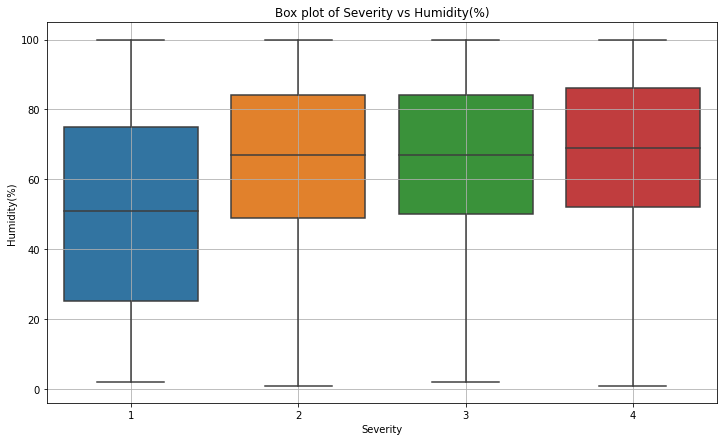

In [74]:
df_temp = df[["Humidity(%)", "Severity"]]

plt.figure(figsize=[12, 7])
plt.title("Box plot of Severity vs Humidity(%)")
sns.boxplot(
    y="Humidity(%)", x="Severity", data=df_temp,
)
plt.grid()
plt.show()

1. accidents with severity 1 are seen in between humidity percentage of ≈25-75
1. accidents with severity 2,3,4 are observed between humidity percentage of ≈50-80

## Severity - Wind_Speed(mph)

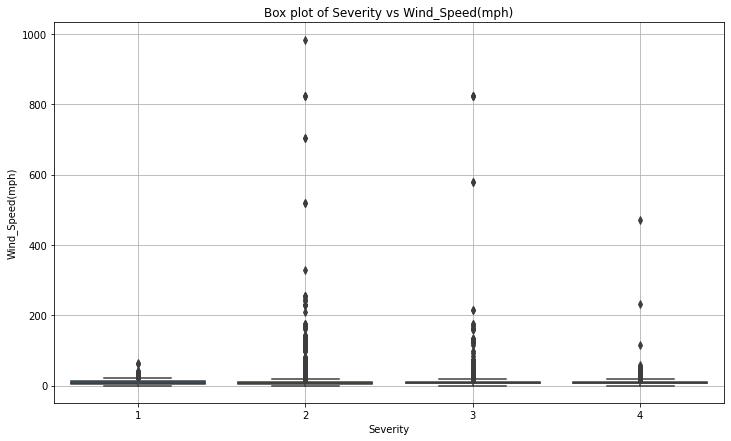

In [76]:
df_temp = df[["Severity", "Wind_Speed(mph)"]]

plt.figure(figsize=[12, 7])
plt.title("Box plot of Severity vs Wind_Speed(mph)")
sns.boxplot(
    y="Wind_Speed(mph)", x="Severity", data=df_temp,
)
plt.grid()
plt.show()

1. IQR of wind speed for severity 1,2,3,4 are in very similar ranges
1. whereas long tails are observed for wind speed across severity 2,3

## Severity - POI variables 

In [96]:
def poi_charts(df, poi_var):
    # prepare data
    df_temp = df[[poi_var, "Severity"]]
    var = f"per_{poi_var}_severity_sum"
    df_temp[var] = 1
    df_temp = df_temp.groupby([poi_var, "Severity"], as_index=False).sum()
    display(df_temp)

    # plot
    plt.figure(figsize=[8, 5])

    plt.title(f"Box plot of Severity vs {i}")
    sns.barplot(
        y=var, x=poi_var, data=df_temp, hue="Severity", order=[True, False],
    )
    plt.grid()
    plt.show()

In [109]:
poi_list = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]

,Amenity,Severity,per_Amenity_severity_sum
0,False,1,28682
1,False,2,2335907
2,False,3,995745
3,False,4,111201
4,True,1,492
5,True,2,37303
6,True,3,3168
7,True,4,1119


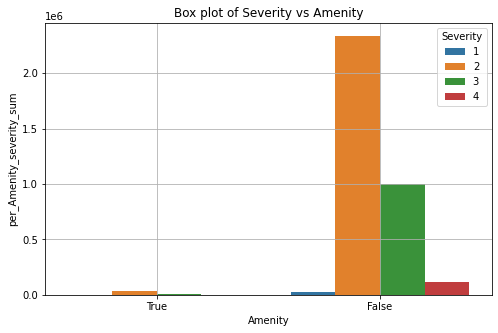

,Bump,Severity,per_Bump_severity_sum
0,False,1,29164
1,False,2,2372704
2,False,3,998830
3,False,4,112313
4,True,1,10
5,True,2,506
6,True,3,83
7,True,4,7


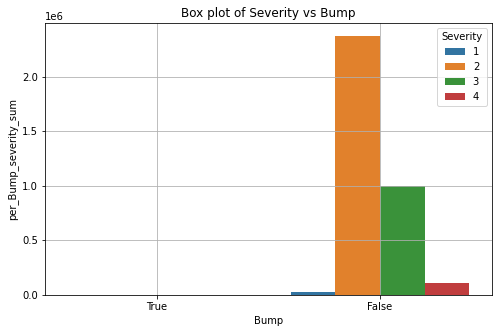

,Crossing,Severity,per_Crossing_severity_sum
0,False,1,20250
1,False,2,2132468
2,False,3,979387
3,False,4,106986
4,True,1,8924
5,True,2,240742
6,True,3,19526
7,True,4,5334


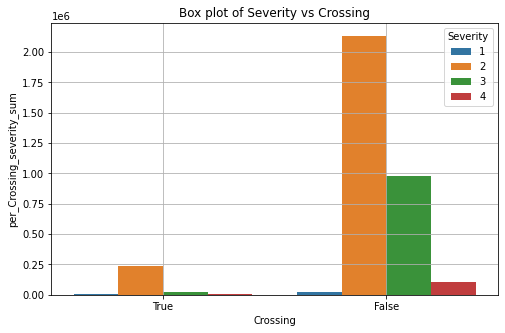

,Give_Way,Severity,per_Give_Way_severity_sum
0,False,1,29101
1,False,2,2365889
2,False,3,997114
3,False,4,111949
4,True,1,73
5,True,2,7321
6,True,3,1799
7,True,4,371


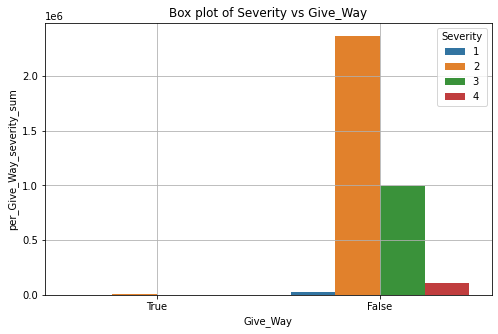

,Junction,Severity,per_Junction_severity_sum
0,False,1,26649
1,False,2,2209455
2,False,3,893591
3,False,4,99473
4,True,1,2525
5,True,2,163755
6,True,3,105322
7,True,4,12847


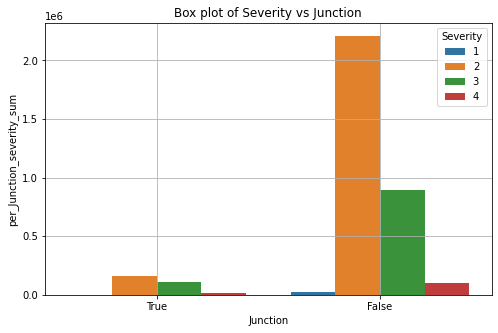

,No_Exit,Severity,per_No_Exit_severity_sum
0,False,1,29075
1,False,2,2369927
2,False,3,998039
3,False,4,112192
4,True,1,99
5,True,2,3283
6,True,3,874
7,True,4,128


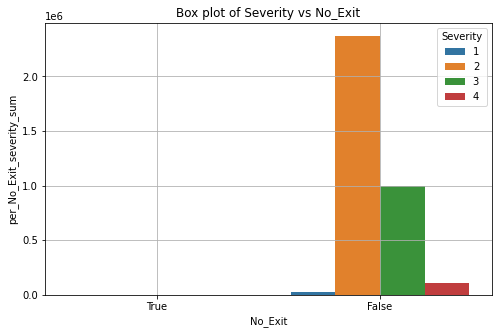

,Railway,Severity,per_Railway_severity_sum
0,False,1,28636
1,False,2,2348621
2,False,3,993678
3,False,4,111507
4,True,1,538
5,True,2,24589
6,True,3,5235
7,True,4,813


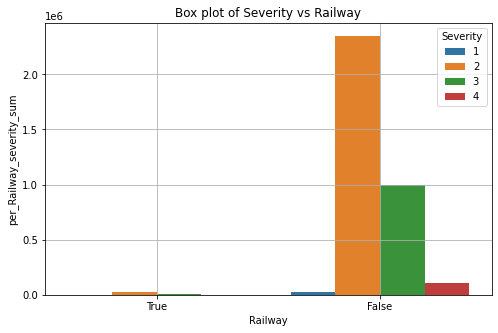

,Roundabout,Severity,per_Roundabout_severity_sum
0,False,1,29173
1,False,2,2373032
2,False,3,998911
3,False,4,112317
4,True,1,1
5,True,2,178
6,True,3,2
7,True,4,3


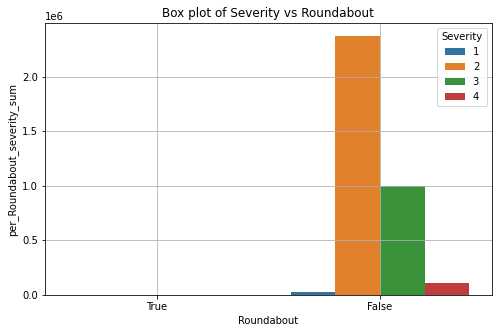

,Station,Severity,per_Station_severity_sum
0,False,1,28215
1,False,2,2314019
2,False,3,990321
3,False,4,110741
4,True,1,959
5,True,2,59191
6,True,3,8592
7,True,4,1579


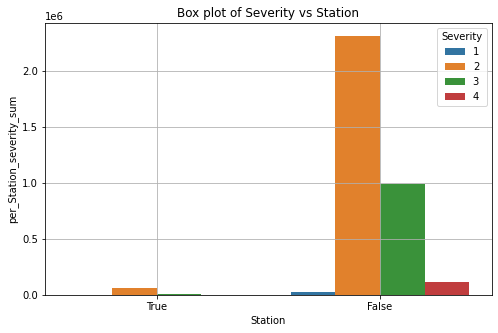

,Stop,Severity,per_Stop_severity_sum
0,False,1,28696
1,False,2,2325825
2,False,3,996302
3,False,4,110818
4,True,1,478
5,True,2,47385
6,True,3,2611
7,True,4,1502


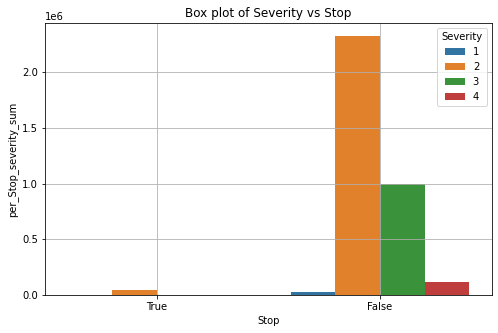

,Traffic_Calming,Severity,per_Traffic_Calming_severity_sum
0,False,1,29162
1,False,2,2372039
2,False,3,998730
3,False,4,112285
4,True,1,12
5,True,2,1171
6,True,3,183
7,True,4,35


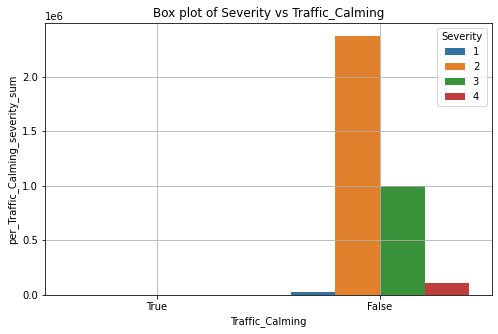

,Traffic_Signal,Severity,per_Traffic_Signal_severity_sum
0,False,1,16717
1,False,2,1833400
2,False,3,938661
3,False,4,101216
4,True,1,12457
5,True,2,539810
6,True,3,60252
7,True,4,11104


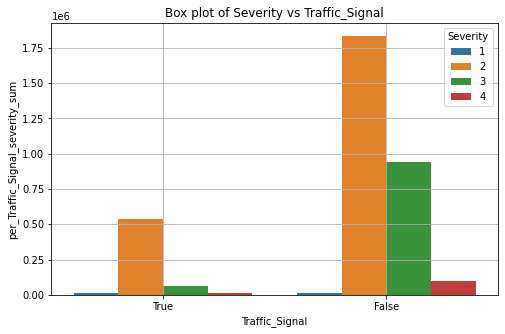

,Turning_Loop,Severity,per_Turning_Loop_severity_sum
0,False,1,29174
1,False,2,2373210
2,False,3,998913
3,False,4,112320


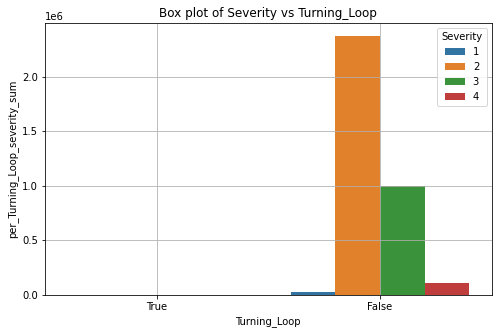

In [110]:
for i in poi_list:
    poi_charts(df, i)
    print("\n\n")

Following observations can be made from severity - poi variables plots:

1. in most of the cases absence of POIs have more occurences of accidents of varying severity e.g: 
    1. absence of traffic signal 
    1. turning loop
    1. stop signs
1. in some of the cases even presence of POIs have some occurences of accidents of varying severity e.g:
    1. Traffic signal
    1. Crossing
    1. Junction
1. Accidents with severity 2 are most occuring accidents in all of the POIs

# Multivariate analysis

## Severity - Humidity - Temperature

In [115]:
df_temp = df[["Severity", "Humidity(%)", "Temperature(F)"]]
df_temp["Temperature(C)"] = (df_temp["Temperature(F)"] - 32) / 1.8

Contour plots of Humidity, Temperature with varying severity

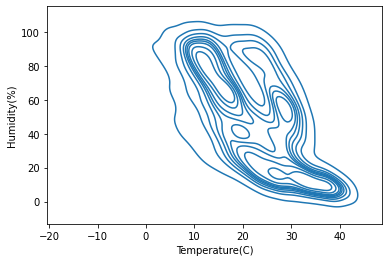

In [120]:
sns.kdeplot(
    data=df_temp[df_temp["Severity"] == 1], x="Temperature(C)", y="Humidity(%)",
)
plt.show()

1. for severity of accidents 1
    - humidity % range between 0-20
    - and temperature(C) between 20-40
    - show high over lap
1. similar observation can be made for another fairly dense region
    - humidity % range between 60-90
    - and temperature(C) between 10-20
    - show high over lap

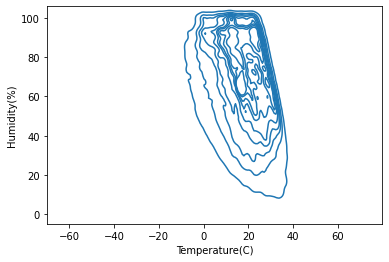

In [121]:
sns.kdeplot(
    data=df_temp[df_temp["Severity"] == 2], x="Temperature(C)", y="Humidity(%)",
)
plt.show()

1. for severity of accidents 2
    - humidity % range between 90-100
    - and temperature(C) between 0-30
    - show high over lap
1. similar observation can be made for another dense region
    - humidity % range between 50-100
    - and temperature(C) between 25-35
    - show high over lap

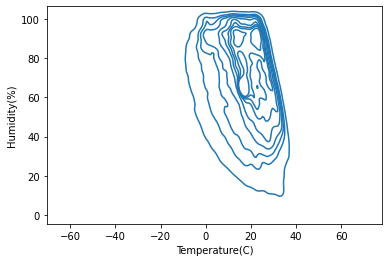

In [122]:
sns.kdeplot(
    data=df_temp[df_temp["Severity"] == 3], x="Temperature(C)", y="Humidity(%)",
)
plt.show()

1. for severity of accidents 3
    - humidity % range between 90-100
    - and temperature(C) between 10-30
    - show high over lap
1. similar observation can be made for another dense region
    - humidity % range between 40-100
    - and temperature(C) between 20-35
    - show high over lap

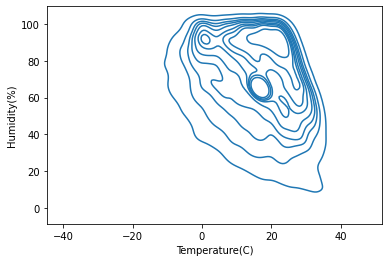

In [123]:
sns.kdeplot(
    data=df_temp[df_temp["Severity"] == 4], x="Temperature(C)", y="Humidity(%)",
)
plt.show()

1. for severity of accidents 4
    - humidity % range between 90-100
    - and temperature(C) between 0-30
    - show high over lap
1. similar observation can be made for another dense region
    - humidity % range between 50-100
    - and temperature(C) between 20-35
    - show high over lap

# Concluding EDA

1. There is a skew in distribution/ occurences of accidents across variables
1. Severities of accidents also has a skew across multiple variables
1. Interesting patterns can be observed w.r.t Weather variables and Severity
1. Combination of multiple POI variables might give some interesting results while modelling
1. Occurence of accidents across different cities and states vary
1. Text features such as description hold informative keywords which could be leveraged to build features